In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mental Health in Tech Survey.zip to Mental Health in Tech Survey.zip


In [ ]:
import zipfile
import os
zip_file_name = "Mental Health in Tech Survey.zip"

extract_folder = "mental_health_data"
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Содержимое папки после распаковки:")
print(os.listdir(extract_folder))

Содержимое папки после распаковки:
['Mental Health in Tech Survey']


In [ ]:
import pandas as pd
csv_path = "mental_health_data/Mental Health in Tech Survey/survey.csv"
df = pd.read_csv(csv_path)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.isnull().sum() # сколько пропущенных NaN по столбикам

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [ ]:
df.columns #имена всех столбов

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.shape # сколько строк и столбов

(1259, 27)

In [ ]:
(df.isnull().sum() / len(df)) * 100 # процент пропущенных значений на каждый столб

,0
Timestamp,0.000000
Age,0.000000
Gender,0.000000
Country,0.000000
state,40.905481
self_employed,1.429706
family_history,0.000000
treatment,0.000000
work_interfere,20.969023
no_employees,0.000000


In [ ]:
df = df.dropna(thresh=int(len(df) * 0.5), axis=1) # все что больше 50 процентов - с пляжа
print("Columns were successfully dropped")
df.isnull().sum()

Columns were successfully dropped


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [ ]:
threshold = int(len(df) * 0.5) #нет пропусков более 50 процентов - идем дальше
to_drop = df.columns[df.isnull().sum() > (len(df) - threshold)]
print("about to drop:", list(to_drop))

about to drop: []


In [ ]:
df['state'] = df['state'].fillna('Unknown')
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])
print(df[['state', 'self_employed', 'work_interfere']].isnull().sum())


state             0
self_employed     0
work_interfere    0
dtype: int64


In [ ]:
print("Min age:", df['Age'].min()) #посмотрим так себе ответы по восрасту и отфильтруем мертвые души
print("Max age:", df['Age'].max())
df = df[(df['Age'] >= 10) & (df['Age'] <= 100)]

Min age: -1726
Max age: 99999999999


In [ ]:
print("Min age:", df['Age'].min()) #живой пипл
print("Max age:", df['Age'].max())

Min age: 11
Max age: 72


In [ ]:
categorical_columns = ['Gender', 'Country', 'no_employees', 'work_interfere', 'leave'] #посмотрим есть ли мусор или дубли по значениям
for col in categorical_columns:
    print(f"\n{col}:\n{df[col].value_counts()}")


Gender:
Gender
Male                                              612
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
something kinda male?                               1
Trans-female                                        1
Cis Female                                          1
Male-ish    

In [ ]:
def clean_gender(gender): # приведем в порядок значения по полу,- округлим до трех
    gender = str(gender).lower()

    if gender in ['male', 'm', 'male ', 'cis male', 'man', 'msle', 'mail', 'malr', 'mal', 'maile', 'make', 'guy', 'male (cis)', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'female (cis)', 'woman', 'femail', 'femake', 'female (trans)', 'trans-female', 'cis-female/femme']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'].value_counts())

Gender
Male      986
Female    248
Other      18
Name: count, dtype: int64


/tmp/ipython-input-325112538.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['treatment'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


<Figure size 1000x500 with 0 Axes>

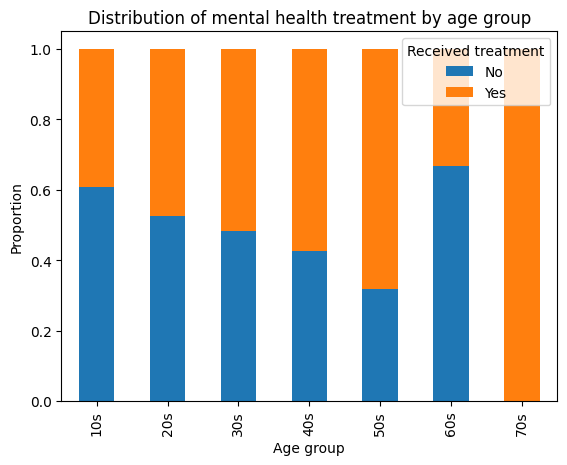

In [ ]:
import matplotlib.pyplot as plt

age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 5))
df.groupby('age_group')['treatment'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of mental health treatment by age group')
plt.ylabel('Proportion')
plt.xlabel('Age group')
plt.legend(title='Received treatment')
plt.show()


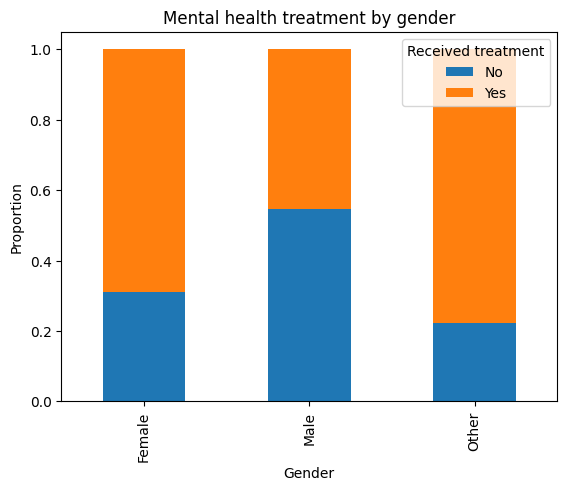

In [ ]:
df['treatment'].groupby(df['Gender']).value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Mental health treatment by gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Received treatment')
plt.show()


In [ ]:
treatment_by_country = df.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)
top = treatment_by_country.sort_values('Yes', ascending=False).head(10)
bottom = treatment_by_country.sort_values('Yes', ascending=True).head(10)

print("Top 10 countries by mental health treatment rate:")
print(top['Yes'])

print("\nBottom 10 countries by mental health treatment rate:")
print(bottom['Yes'])


Top 10 countries by mental health treatment rate:
Country
Croatia          1.000000
Denmark          1.000000
Japan            1.000000
Slovenia         1.000000
Moldova          1.000000
South Africa     0.666667
New Zealand      0.625000
Australia        0.619048
Poland           0.571429
United States    0.546185
Name: Yes, dtype: float64

Bottom 10 countries by mental health treatment rate:
Country
Austria                   0.0
Bosnia and Herzegovina    0.0
China                     0.0
Colombia                  0.0
Georgia                   0.0
Czech Republic            0.0
Costa Rica                0.0
Greece                    0.0
Latvia                    0.0
Philippines               0.0
Name: Yes, dtype: float64
